In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import nltk 
import tensorflow as tf
from tensorflow.keras import regularizers
import keras
from keras.preprocessing.text import Tokenizer
from keras.activations import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, GlobalAveragePooling2D, multiply, Flatten, Bidirectional, BatchNormalization, Reshape
from keras.models import Model
from keras import preprocessing, Input
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import gensim
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from keras.layers import BatchNormalization
from keras.layers.rnn.bidirectional import Bidirectional
from keras.layers import LSTM, BatchNormalization, Dropout, Dense
from keras.models import Sequential
import re
from PIL import Image, ImageFile

!pip install keras_preprocessing
from keras_preprocessing.sequence import pad_sequences
adam = keras.optimizers.Adam(lr=1e-3) # Optimizer Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the dataset
#outputPath =  "dataset/output"
#word2vec_path='amharic-word2vec-300D.gz'
#dataset_path= 'preprocessed_multimodal_dataset_last_all_840.xlsx'
#img_dir = "dataset/images/"
#class_weight = {1: 1.4,
#               0: 1.0}

# Read the dataset
outputPath =  "/content/drive/MyDrive/dataset_copy/"
word2vec_path='/content/drive/MyDrive/amharic-word2vec-300D.gz'
dataset_path= '/content/drive/MyDrive/dataset_copy/preprocessed_multimodal_dataset_last_all_840.xlsx'
img_dir = "/content/drive/MyDrive/dataset_copy/IMG/"
class_weight = {1: 1.4,
                0: 1.0}              

In [4]:
#%cd /content/drive/My Drive/dataset_copy/

In [5]:
#!unzip /content/drive/MyDrive/dataset_copy/images.zip

In [30]:
# Define the column names
col_names = ['image', 'text', 'Lable']

# Read the Excel file into a pandas dataframe with the defined column names
#df = pd.read_excel('path/to/excel_file.xlsx', header=0, names=col_names)

dataset = pd.read_excel(dataset_path, header=0, names=col_names)
dataset = dataset.dropna()


In [31]:
dataset.head


<bound method NDFrame.head of       image                                               text          Lable
0       454                                                 ሁን  normal speech
1       994    ሃመር ባሬ ተቀጣጥረው ሚሪንዳ እገባበዙና ግዘርች አለማችንን እንደጉድ ቀጨን  normal speech
2       327                                    ሃሬ ያራቀት ይሬ ሆ ሳሳ    hate speech
3       859  ሃበሻ ማለትኮ የሬሳ ሳጥን ሊገዛ ሄዶ ቀንስልኝ ደንበኛ እንሆናለን የሚል ድንቅ    hate speech
4       864                   ሃበሻ ማለትኮ ዶሮ ወጥን ሳምንት የሚመገብ ሃስማተኛ  normal speech
...     ...                                                ...            ...
1536    686  ፕሮቴስታንት ጀለስህ ሄደህ ላንተ ጾመኛ ብለው ሽሮ ሰተውህ ለራሳቸው ዝልዝ...    hate speech
1537   1469                               ፖለሳማተታና ረሰብ አሸ የለበተም  normal speech
1538    385         ፖለቲካ ወፌ ከመጥፋቱ የተነሳ አክቲቪስቶች የስፖርት ጋዜጠኛ ሆነዋል    hate speech
1539    924               ፖሊስ መቶኝ ፖሊሱ ዱላ ስለተቀበልን እንደሚመታ ለማረጋገጥ    hate speech
1540    968                   ፖሊሶች እንድ ተመስጠው የሚጽፉት ጽሁፍ ቦባ ሆወርቫ    hate speech

[1541 rows x 3 columns]>

In [32]:
label_map = {'normal speech': 0, 'hate speech': 1}
dataset["Lable"] = dataset["Lable"].map(label_map)

# Splitting Dataset into Traing, Test and Validation

In [36]:
# splitting dataset into traing, test and validation
df=dataset
X_train, X_test, y_train, y_test = train_test_split(df[['image', 'text']], df['Lable'], test_size=0.2, random_state=42)

# Vectorization - Word2Vec


In [37]:
# process the whole observation into single list
train_text_list= [str(d).split() for d in X_train['text'].tolist()]
test_text_list =  [str(d).split() for d in X_test['text'].tolist()] 

# process the whole observation into single list
y_train= [str(d).split() for d in y_train.tolist()]
y_test =  [str(d).split() for d in y_test.tolist()] 

In [38]:
print(len(y_train))
print(len(y_test))
print(len(y_test) + len(y_train))

1232
309
1541


In [21]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=False) 

In [22]:
word2vec_model.most_similar('ፕሬዚዳንት')

[('ፕሬዝዳንት', 0.9391763210296631),
 ('ፕሬዚደንት', 0.8841735124588013),
 ('ፕሬዝደንት', 0.8793289661407471),
 ('ፕሬዘዳንት', 0.8680737614631653),
 ('ፕረዚዳንት', 0.7794119119644165),
 ('ፕሬዜዳንት', 0.7635672688484192),
 ('ፕ/ት', 0.7569063305854797),
 ('ኘሬዚዳንት', 0.7424346208572388),
 ('ኘሬዝዳንት', 0.7404597997665405),
 ('ፕሬዚዳት', 0.7297983765602112)]

In [39]:
# Tokenize the sentences and encode them into sequence of integers
max_length=25
DIM = 300
maxlen = 25

vocab_size = 7582
tokenizer_train = Tokenizer()
tokenizer_train = Tokenizer(num_words=vocab_size, oov_token="unk")
tokenizer_train.fit_on_texts(train_text_list)
train_sequence = np.array(tokenizer_train.texts_to_sequences(train_text_list), dtype=object)
x_train = pad_sequences(train_sequence, padding='post', maxlen=max_length)

tokenizer_test = Tokenizer()
tokenizer_test = Tokenizer(num_words=vocab_size, oov_token="unk")
tokenizer_test.fit_on_texts(test_text_list)
test_sequence = np.array(tokenizer_test.texts_to_sequences(test_text_list), dtype=object)
x_test = pad_sequences(test_sequence, padding='post', maxlen=max_length)



In [40]:
from keras.utils import to_categorical

x_train = x_train.astype(np.float32)

y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')


y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)



#y_test = y_test.values.reshape(-1,1)
#y_train = y_train.values.reshape(-1,1)
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)


In [ ]:

print(len(y_train))

In [43]:
print(len(x_train))
print(len(x_test))
print(len(x_test) + len(x_train))

1232
309
1541


In [44]:
print(y_train.shape)
print(x_train.shape)

(1232, 2)
(1232, 25)


In [45]:
vocab_size = len(tokenizer_train.word_index)
vocab = tokenizer_train.word_index

In [46]:
vocab_size

7754

In [47]:
vocab_size = len(tokenizer_train.word_index)+1
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer_train.word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

# Text model Development**

In [152]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

### BiLSTM model development

In [248]:
model_t=Sequential()
np.random.seed(0)
model_t.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model_t.add(Bidirectional(LSTM(32,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1]))))
model_t.add(BatchNormalization())
model_t.add(Dropout(0.1))
model_t.add(Flatten())
model_t.add(Dense(64))
model_t.add(Dropout(0.1))
model_t.add(Dense(32))
model_t.add(Dropout(0.1))
model_t.add(Dense(2,activation='softmax'))


In [249]:
#plot_model(model_t, to_file=outputPath+'LSTM_model.png', show_shapes=True, show_layer_names=True)

In [250]:
# Saving text model
#model_t.save(outputPath+'BiLSTM_text_model.h5')

In [251]:
model_t.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

histry = model_t.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
39/39 [==============================] - 9s 37ms/step - loss: 0.7377 - accuracy: 0.5820
Epoch 2/40
39/39 [==============================] - 2s 60ms/step - loss: 0.5434 - accuracy: 0.7175
Epoch 3/40
39/39 [==============================] - 3s 66ms/step - loss: 0.4480 - accuracy: 0.7938
Epoch 4/40
39/39 [==============================] - 2s 40ms/step - loss: 0.3694 - accuracy: 0.8263
Epoch 5/40
39/39 [==============================] - 1s 37ms/step - loss: 0.2943 - accuracy: 0.8669
Epoch 6/40
39/39 [==============================] - 1s 37ms/step - loss: 0.2360 - accuracy: 0.8945
Epoch 7/40
39/39 [==============================] - 2s 39ms/step - loss: 0.1828 - accuracy: 0.9196
Epoch 8/40
39/39 [==============================] - 1s 38ms/step - loss: 0.1369 - accuracy: 0.9416
Epoch 9/40
39/39 [==============================] - 1s 38ms/step - loss: 0.1217 - accuracy: 0.9505
Epoch 10/40
39/39 [==============================] - 2s 40ms/step - loss: 0.1011 - accuracy: 0.9643
Epoch 11/

In [252]:
# Evaluating the model
#train_acc = histry.history['accuracy']
#print("Training Accuracy:", train_acc)

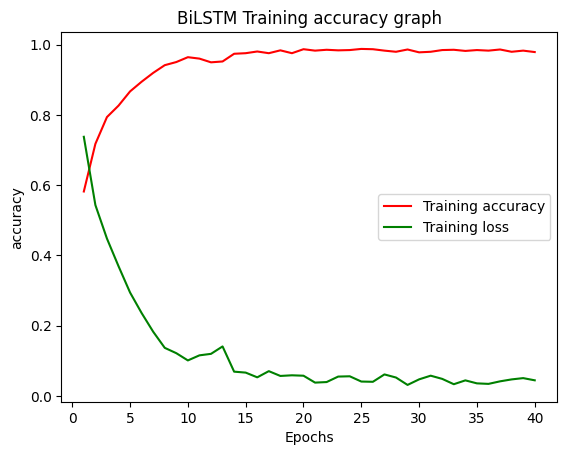

In [253]:
# Plotting training  accuracy for combined model
train_acc = histry.history['accuracy']
train_loss = histry.history['loss']

epochs = range(1, len(histry.history['accuracy'] )+ 1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.title('BiLSTM Training accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [254]:
# Evaluate the model on test data
test_loss, test_acc = model_t.evaluate(x_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry.history['accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)

10/10 [==============================] - 1s 13ms/step - loss: 3.6093 - accuracy: 0.4822
Last accuracy value for training:  0.9788960814476013
Last accuracy value for testing:  0.48220065236091614


### LSTM Model development***


In [255]:
LSTM_model_t = Sequential()
np.random.seed(0)
LSTM_model_t.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))
LSTM_model_t.add(LSTM(32, return_sequences=True))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.1))
LSTM_model_t.add(LSTM(64))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.1))
LSTM_model_t.add(Dense(32))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.1))
LSTM_model_t.add(Dense(2, activation='softmax'))
LSTM_model_t.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [256]:
#plot_model(LSTM_model_t, to_file=outputPath+'LSTM_model.png', show_shapes=True, show_layer_names=True)
# Saving text model
#LSTM_model_t.save(outputPath+'LSTM_text_model.h5')

In [257]:
histry_lstm = LSTM_model_t.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
39/39 [==============================] - 9s 59ms/step - loss: 0.7097 - accuracy: 0.5852
Epoch 2/40
39/39 [==============================] - 2s 40ms/step - loss: 0.6260 - accuracy: 0.6477
Epoch 3/40
39/39 [==============================] - 2s 41ms/step - loss: 0.5647 - accuracy: 0.7135
Epoch 4/40
39/39 [==============================] - 2s 61ms/step - loss: 0.5235 - accuracy: 0.7419
Epoch 5/40
39/39 [==============================] - 2s 46ms/step - loss: 0.4524 - accuracy: 0.7906
Epoch 6/40
39/39 [==============================] - 2s 41ms/step - loss: 0.3901 - accuracy: 0.8206
Epoch 7/40
39/39 [==============================] - 2s 53ms/step - loss: 0.3416 - accuracy: 0.8458
Epoch 8/40
39/39 [==============================] - 2s 63ms/step - loss: 0.2850 - accuracy: 0.8766
Epoch 9/40
39/39 [==============================] - 2s 48ms/step - loss: 0.2750 - accuracy: 0.8912
Epoch 10/40
39/39 [==============================] - 2s 41ms/step - loss: 0.2565 - accuracy: 0.8896
Epoch 11/

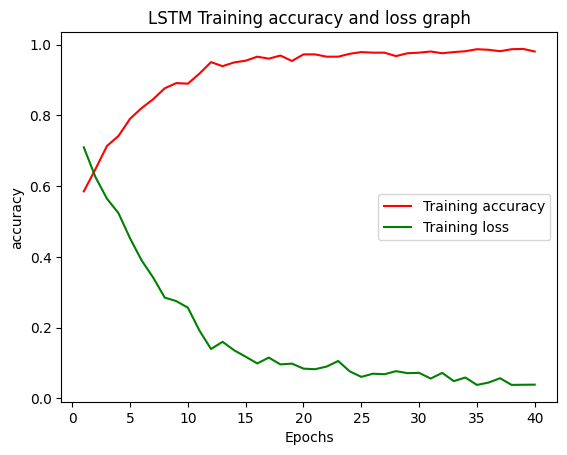

In [258]:
# Plotting training  accuracy for combined model
lstm_train_acc = histry_lstm.history['accuracy']
lstm_train_loss = histry_lstm.history['loss']
epochs = range(1, len(histry_lstm.history['accuracy'] )+ 1)
plt.plot(epochs, lstm_train_acc, 'r', label='Training accuracy')
plt.plot(epochs, lstm_train_loss, 'g', label='Training loss')
plt.title('LSTM Training accuracy and loss graph')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [259]:
# Evaluate the model on test data
test_loss, test_acc = LSTM_model_t.evaluate(x_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry_lstm.history['accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)

10/10 [==============================] - 1s 14ms/step - loss: 2.5198 - accuracy: 0.4984
Last accuracy value for training:  0.9805194735527039
Last accuracy value for testing:  0.4983818829059601


### CNN Model Development

In [260]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential

CNN_model_t = Sequential()
np.random.seed(0)
CNN_model_t.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))
CNN_model_t.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
CNN_model_t.add(MaxPooling1D(pool_size=2))
CNN_model_t.add(BatchNormalization())
CNN_model_t.add(Dropout(0.1))
CNN_model_t.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
CNN_model_t.add(MaxPooling1D(pool_size=2))
CNN_model_t.add(BatchNormalization())
CNN_model_t.add(Dropout(0.1))
CNN_model_t.add(Flatten())
CNN_model_t.add(Dense(64, activation='relu'))
CNN_model_t.add(BatchNormalization())
CNN_model_t.add(Dropout(0.1))
CNN_model_t.add(Dense(32, activation='relu'))
CNN_model_t.add(BatchNormalization())
CNN_model_t.add(Dropout(0.1))
CNN_model_t.add(Dense(2, activation='softmax'))
CNN_model_t.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [261]:
#plot_model(CNN_model_t, to_file=outputPath+'cnn_model_t.png', show_shapes=True, show_layer_names=True)


In [262]:
# Saving text model
#CNN_model_t.save(outputPath+'LSTM_text_model.h5')

In [263]:
histry_cnn = CNN_model_t.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
39/39 [==============================] - 4s 19ms/step - loss: 0.7969 - accuracy: 0.5333
Epoch 2/40
39/39 [==============================] - 1s 18ms/step - loss: 0.6450 - accuracy: 0.6631
Epoch 3/40
39/39 [==============================] - 1s 16ms/step - loss: 0.5494 - accuracy: 0.7403
Epoch 4/40
39/39 [==============================] - 0s 12ms/step - loss: 0.4623 - accuracy: 0.8028
Epoch 5/40
39/39 [==============================] - 0s 12ms/step - loss: 0.3881 - accuracy: 0.8490
Epoch 6/40
39/39 [==============================] - 0s 12ms/step - loss: 0.3211 - accuracy: 0.8709
Epoch 7/40
39/39 [==============================] - 0s 12ms/step - loss: 0.2396 - accuracy: 0.9164
Epoch 8/40
39/39 [==============================] - 0s 12ms/step - loss: 0.1859 - accuracy: 0.9432
Epoch 9/40
39/39 [==============================] - 0s 12ms/step - loss: 0.1517 - accuracy: 0.9424
Epoch 10/40
39/39 [==============================] - 0s 12ms/step - loss: 0.1373 - accuracy: 0.9481
Epoch 11/

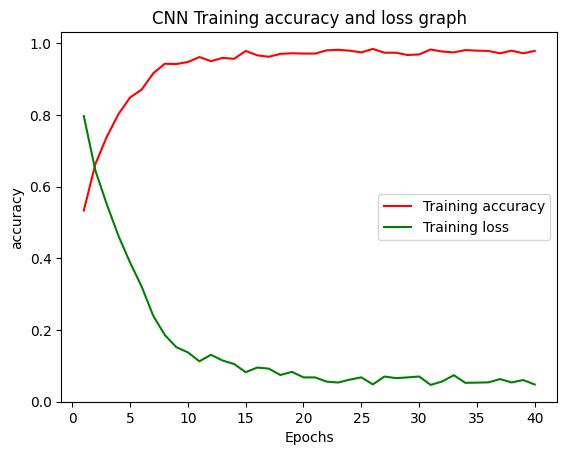

In [264]:
# Plotting training  accuracy for combined model
CNN_train_acc = histry_cnn.history['accuracy']
CNN_train_loss = histry_cnn.history['loss']
epochs = range(1, len(histry_cnn.history['accuracy'] )+ 1)
plt.plot(epochs, CNN_train_acc, 'r', label='Training accuracy')
plt.plot(epochs, CNN_train_loss, 'g', label='Training loss')
plt.title('CNN Training accuracy and loss graph')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [265]:
# Evaluate the model on test data
test_loss, test_acc = CNN_model_t.evaluate(x_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry_cnn.history['accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)

10/10 [==============================] - 0s 4ms/step - loss: 1.9316 - accuracy: 0.5049
Last accuracy value for training:  0.9788960814476013
Last accuracy value for testing:  0.5048543810844421


## ALL GRAPH 3 ALGO

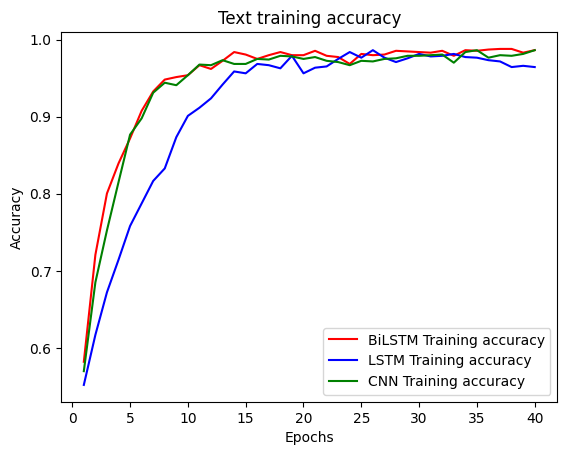

In [247]:
# Plotting training and validation accuracy for combined model
train_acc = histry.history['accuracy']
lstm_train_acc = histry_lstm.history['accuracy']
CNN_train_acc = histry_cnn.history['accuracy']
epochs = range(1, len(histry.history['accuracy'] )+ 1)
plt.plot(epochs, train_acc, 'r', label='BiLSTM Training accuracy')
plt.plot(epochs, lstm_train_acc, 'b', label='LSTM Training accuracy')
plt.plot(epochs, CNN_train_acc, 'g', label='CNN Training accuracy')
plt.title('Text training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [172]:
img_dir

'/content/drive/MyDrive/dataset_copy/IMG/'

# Image Model Development

In [173]:
## image path 
img_path=[]
def create_img_path(DF, Col_name, img_dir):
    formats = ['.jpg', '.PNG', '.JPG', '.png', '.JPEG', '.GIF', '.PSD', '.jpeg']
    img_path=[]
    for file_name in DF['image']:
        for fmt in formats:
            if str(file_name) + fmt in os.listdir(img_dir):
                img_path.append(img_dir + str(file_name) + fmt)
                break
        else:
            raise ValueError(f'Could not find image {file_name} in {img_dir}')
    return img_path

# Creating train, test and validation image path
#train_img_paths = create_img_path(X_train, 'image', img_dir)
#test_img_paths = create_img_path(X_test, 'image', img_dir)


In [174]:
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from keras.applications import VGG16

In [ ]:
#vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# set image size and other parameters
image_size = (224, 224)
n_channels = 3
batch_size = 32

# load and preprocess images for feature extraction
def load_and_preprocess_image(image_path):
    image = load_img(image_path, target_size=image_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    return image

def extract_features(image_paths):
    n_images = len(image_paths)
    features = np.zeros((n_images, 7, 7, 512))
    for i in range(0, n_images, batch_size):
        batch_paths = image_paths[i:i+batch_size]
        n_batch = len(batch_paths)
        batch_data = np.zeros((n_batch,) + image_size + (n_channels,))
        for j, path in enumerate(batch_paths):
            image = load_and_preprocess_image(path)
            batch_data[j] = image
        batch_features = vgg16.predict(batch_data)
        features[i:i+n_batch] = batch_features
    return features.reshape(n_images, -1)

# extract features from train images
#train_features = extract_features(train_img_paths)
#test_features = extract_features(test_img_paths)


In [176]:
# save train and test features as numpy arrays
np.save('train_features.npy', train_features)
np.save('test_features.npy', test_features)


In [177]:
# load saved train and test features
train_features = np.load('train_features.npy')
test_features = np.load('test_features.npy')

In [178]:
print(train_features.shape)
print(test_features.shape)

(1232, 25088)
(309, 25088)


In [179]:
# reshape features to match CNN input shape
train_features = train_features.reshape(len(train_features), 7, 7, 512)
test_features = test_features.reshape(len(test_features), 7, 7, 512)


#### CNN model for Image

In [288]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

CNN_model_i = Sequential()
CNN_model_i.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(7, 7, 512)))
CNN_model_i.add(BatchNormalization())
CNN_model_i.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model_i.add(Dropout(0.1))
CNN_model_i.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"))
CNN_model_i.add(BatchNormalization())
CNN_model_i.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model_i.add(Dropout(0.1))
CNN_model_i.add(Flatten())
CNN_model_i.add(Dense(64, activation='relu'))
CNN_model_i.add(BatchNormalization())
CNN_model_i.add(Dropout(0.1))
CNN_model_i.add(Dense(32, activation='relu'))
CNN_model_i.add(Dense(2, activation='softmax'))

CNN_model_i.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_image_cnn =CNN_model_i.fit(train_features, y_train, epochs=32, batch_size=64)

Epoch 1/32
20/20 [==============================] - 4s 93ms/step - loss: 0.7176 - accuracy: 0.5917
Epoch 2/32
20/20 [==============================] - 2s 90ms/step - loss: 0.6314 - accuracy: 0.6794
Epoch 3/32
20/20 [==============================] - 2s 87ms/step - loss: 0.5671 - accuracy: 0.7159
Epoch 4/32
20/20 [==============================] - 2s 97ms/step - loss: 0.5240 - accuracy: 0.7565
Epoch 5/32
20/20 [==============================] - 3s 145ms/step - loss: 0.4381 - accuracy: 0.8222
Epoch 6/32
20/20 [==============================] - 2s 110ms/step - loss: 0.3725 - accuracy: 0.8498
Epoch 7/32
20/20 [==============================] - 2s 87ms/step - loss: 0.3051 - accuracy: 0.8815
Epoch 8/32
20/20 [==============================] - 2s 87ms/step - loss: 0.2359 - accuracy: 0.9067
Epoch 9/32
20/20 [==============================] - 2s 88ms/step - loss: 0.1743 - accuracy: 0.9375
Epoch 10/32
20/20 [==============================] - 2s 88ms/step - loss: 0.1380 - accuracy: 0.9521
Epoch 1

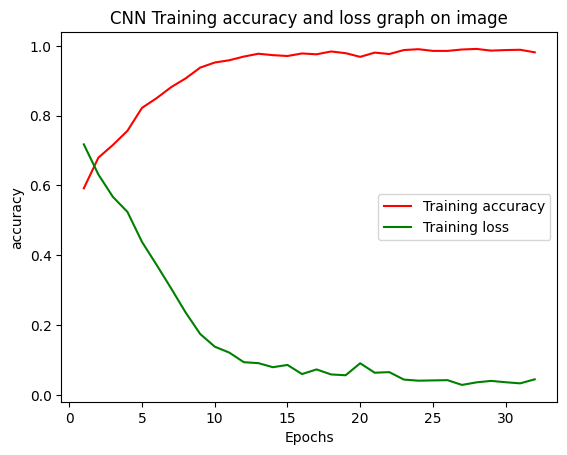

In [289]:

# Plotting training  accuracy for combined model
CNN_train_acc_i = history_image_cnn.history['accuracy']
CNN_train_loss_i = history_image_cnn.history['loss']
epochs = range(1, len(history_image_cnn.history['accuracy'] )+ 1)
plt.plot(epochs, CNN_train_acc_i, 'r', label='Training accuracy')
plt.plot(epochs, CNN_train_loss_i, 'g', label='Training loss')
plt.title('CNN Training accuracy and loss graph on image')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [290]:
# Evaluate the model on test data
test_loss, test_acc = CNN_model_i.evaluate(test_features, y_test)

# Get the last accuracy value for training and testing
train_acc_last = history_image_cnn.history['accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)

10/10 [==============================] - 1s 28ms/step - loss: 3.1339 - accuracy: 0.5113
Last accuracy value for training:  0.9813311696052551
Last accuracy value for testing:  0.5113268494606018


#### BiLSTM Model for Image 

In [291]:


BiLSTM_model_i = Sequential()
BiLSTM_model_i.add(Reshape((7, 7*512), input_shape=(7, 7, 512)))
BiLSTM_model_i.add(Bidirectional(LSTM(32, return_sequences=True)))
BiLSTM_model_i.add(BatchNormalization())
BiLSTM_model_i.add(Dropout(0.1))
BiLSTM_model_i.add(Bidirectional(LSTM(64)))
BiLSTM_model_i.add(BatchNormalization())
BiLSTM_model_i.add(Dropout(0.1))
BiLSTM_model_i.add(Dense(64, activation='relu'))
BiLSTM_model_i.add(BatchNormalization())
BiLSTM_model_i.add(Dropout(0.1))
BiLSTM_model_i.add(Dense(32, activation='relu'))
BiLSTM_model_i.add(Dense(2, activation='softmax'))


In [292]:
BiLSTM_model_i.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_image_bilstm = BiLSTM_model_i.fit(train_features, y_train, epochs=32, batch_size=64)

Epoch 1/32
20/20 [==============================] - 16s 88ms/step - loss: 0.7814 - accuracy: 0.5860
Epoch 2/32
20/20 [==============================] - 2s 86ms/step - loss: 0.5175 - accuracy: 0.7679
Epoch 3/32
20/20 [==============================] - 2s 88ms/step - loss: 0.3736 - accuracy: 0.8596
Epoch 4/32
20/20 [==============================] - 2s 89ms/step - loss: 0.2674 - accuracy: 0.9026
Epoch 5/32
20/20 [==============================] - 2s 87ms/step - loss: 0.1671 - accuracy: 0.9521
Epoch 6/32
20/20 [==============================] - 2s 124ms/step - loss: 0.1188 - accuracy: 0.9651
Epoch 7/32
20/20 [==============================] - 3s 147ms/step - loss: 0.0853 - accuracy: 0.9797
Epoch 8/32
20/20 [==============================] - 2s 88ms/step - loss: 0.0825 - accuracy: 0.9724
Epoch 9/32
20/20 [==============================] - 2s 89ms/step - loss: 0.0839 - accuracy: 0.9700
Epoch 10/32
20/20 [==============================] - 2s 90ms/step - loss: 0.0671 - accuracy: 0.9765
Epoch 

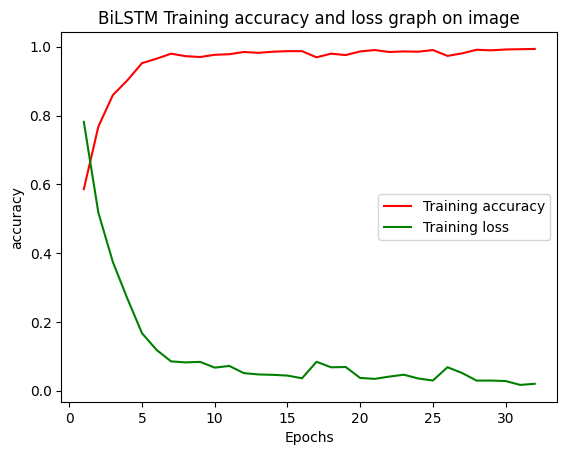

In [293]:
# Plotting training  accuracy for combined model
bilstm_train_acc_i = history_image_bilstm.history['accuracy']
bilstm_train_loss_i = history_image_bilstm.history['loss']
epochs = range(1, len(history_image_bilstm.history['accuracy'] )+ 1)
plt.plot(epochs, bilstm_train_acc_i, 'r', label='Training accuracy')
plt.plot(epochs, bilstm_train_loss_i, 'g', label='Training loss')
plt.title('BiLSTM Training accuracy and loss graph on image')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [294]:
# Evaluate the model on test data
test_loss, test_acc = BiLSTM_model_i.evaluate(test_features, y_test)

# Get the last accuracy value for training and testing
train_acc_last = history_image_bilstm.history['accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)

10/10 [==============================] - 3s 43ms/step - loss: 1.7270 - accuracy: 0.6570
Last accuracy value for training:  0.9935064911842346
Last accuracy value for testing:  0.6569579243659973


### LSTM Image model Development


In [295]:
lstm_model_i = Sequential()
lstm_model_i.add(Reshape((7, 7*512), input_shape=(7, 7, 512)))
lstm_model_i.add(LSTM(32, return_sequences=True))
lstm_model_i.add(BatchNormalization())
lstm_model_i.add(Dropout(0.1))
lstm_model_i.add(LSTM(64))
lstm_model_i.add(BatchNormalization())
lstm_model_i.add(Dropout(0.1))
lstm_model_i.add(Dense(64, activation='relu'))
lstm_model_i.add(BatchNormalization())
lstm_model_i.add(Dropout(0.1))
lstm_model_i.add(Dense(32, activation='relu'))
lstm_model_i.add(Dense(2, activation='softmax'))

In [296]:
lstm_model_i.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_image_lstm = lstm_model_i.fit(train_features, y_train, epochs=32, batch_size=64)

Epoch 1/32
20/20 [==============================] - 7s 49ms/step - loss: 0.7610 - accuracy: 0.5844
Epoch 2/32
20/20 [==============================] - 1s 48ms/step - loss: 0.5483 - accuracy: 0.7354
Epoch 3/32
20/20 [==============================] - 1s 47ms/step - loss: 0.4498 - accuracy: 0.8011
Epoch 4/32
20/20 [==============================] - 1s 71ms/step - loss: 0.3313 - accuracy: 0.8677
Epoch 5/32
20/20 [==============================] - 2s 79ms/step - loss: 0.2545 - accuracy: 0.9058
Epoch 6/32
20/20 [==============================] - 2s 77ms/step - loss: 0.2010 - accuracy: 0.9278
Epoch 7/32
20/20 [==============================] - 1s 50ms/step - loss: 0.1286 - accuracy: 0.9635
Epoch 8/32
20/20 [==============================] - 1s 47ms/step - loss: 0.1066 - accuracy: 0.9667
Epoch 9/32
20/20 [==============================] - 1s 48ms/step - loss: 0.1165 - accuracy: 0.9643
Epoch 10/32
20/20 [==============================] - 1s 47ms/step - loss: 0.1000 - accuracy: 0.9675
Epoch 11/

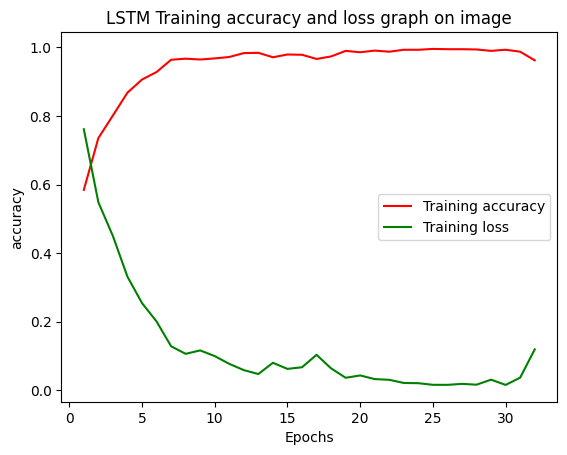

In [297]:

# Plotting training  accuracy for combined model
lstm_train_acc_i = history_image_lstm.history['accuracy']
lstm_train_loss_i = history_image_lstm.history['loss']
epochs = range(1, len(history_image_lstm.history['accuracy'] )+ 1)
plt.plot(epochs, lstm_train_acc_i, 'r', label='Training accuracy')
plt.plot(epochs, lstm_train_loss_i, 'g', label='Training loss')
plt.title('LSTM Training accuracy and loss graph on image')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [298]:
# Evaluate the model on test data
test_loss, test_acc = lstm_model_i.evaluate(test_features, y_test)


# Get the last accuracy value for training and testing
train_acc_last = history_image_lstm.history['accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)

10/10 [==============================] - 1s 14ms/step - loss: 1.3932 - accuracy: 0.6796
Last accuracy value for training:  0.961850643157959
Last accuracy value for testing:  0.6796116232872009


# Image Dataset 3 algo Diagram

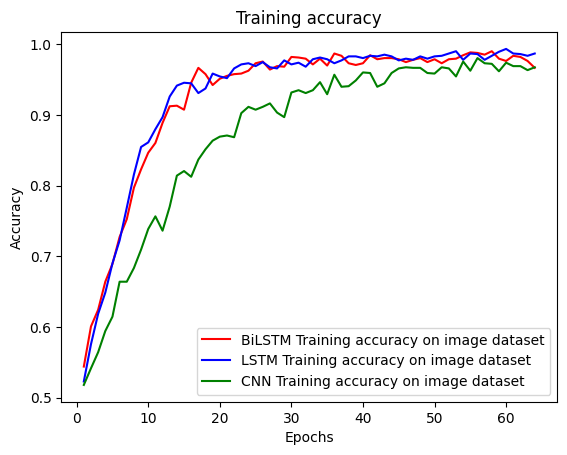

In [191]:
# Plotting training and validation accuracy for combined model
train_acc = history_image_bilstm.history['accuracy']
lstm_train_acc = history_image_lstm.history['accuracy']
CNN_train_acc = history_image_cnn.history['accuracy']
epochs = range(1, len(history_image_bilstm.history['accuracy'] )+ 1)
plt.plot(epochs, train_acc, 'r', label='BiLSTM Training accuracy on image dataset')
plt.plot(epochs, lstm_train_acc, 'b', label='LSTM Training accuracy on image dataset')
plt.plot(epochs, CNN_train_acc, 'g', label='CNN Training accuracy on image dataset')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

## Multimodal 

In [192]:
from keras.models import Model
from keras.layers import Input, concatenate, Dense
import numpy as np
np.random.seed(0)


# LSTM Model

In [313]:
lstm_model_i = Sequential()
lstm_model_i.add(Reshape((7, 7*512), input_shape=(7, 7, 512)))
lstm_model_i.add(LSTM(32, return_sequences=True))
lstm_model_i.add(BatchNormalization())
lstm_model_i.add(Dropout(0.1))
lstm_model_i.add(LSTM(64))
lstm_model_i.add(BatchNormalization())
lstm_model_i.add(Dropout(0.1))
lstm_model_i.add(Dense(64, activation='relu'))
lstm_model_i.add(BatchNormalization())
lstm_model_i.add(Dropout(0.1))
lstm_model_i.add(Dense(32, activation='relu'))
lstm_model_i.add(Dense(2, activation='softmax'))

LSTM_model_t = Sequential()
np.random.seed(0)
LSTM_model_t.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))
LSTM_model_t.add(LSTM(32, return_sequences=True))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.1))
LSTM_model_t.add(LSTM(64))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.1))
LSTM_model_t.add(Dense(32))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.1))
LSTM_model_t.add(Dense(2, activation='softmax'))

# concatenate both models
lstm_multi = concatenate([lstm_model_i.output, LSTM_model_t.output], axis=1)
lstm_multi_outputs = Dense(2, activation='softmax')(lstm_multi)
lstm_merged_model = Model(inputs=[lstm_model_i.input, LSTM_model_t.input], outputs=lstm_multi_outputs)

In [314]:
# concatenate both models
lstm_multi = concatenate([lstm_model_i.output, LSTM_model_t.output], axis=1)
lstm_multi_outputs = Dense(2, activation='softmax')(lstm_multi)
lstm_merged_model = Model(inputs=[lstm_model_i.input, LSTM_model_t.input], outputs=lstm_multi_outputs)

In [315]:
y_train.shape

(1232, 2)

In [316]:
lstm_merged_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
histry_lstm_multimodal = lstm_merged_model.fit([train_features,x_train], y_train, epochs=32, batch_size=32)

Epoch 1/32
39/39 [==============================] - 15s 70ms/step - loss: 0.6689 - accuracy: 0.6274
Epoch 2/32
39/39 [==============================] - 4s 105ms/step - loss: 0.6117 - accuracy: 0.7273
Epoch 3/32
39/39 [==============================] - 2s 62ms/step - loss: 0.5771 - accuracy: 0.7711
Epoch 4/32
39/39 [==============================] - 2s 62ms/step - loss: 0.5490 - accuracy: 0.8076
Epoch 5/32
39/39 [==============================] - 2s 62ms/step - loss: 0.5435 - accuracy: 0.7906
Epoch 6/32
39/39 [==============================] - 2s 63ms/step - loss: 0.5052 - accuracy: 0.8442
Epoch 7/32
39/39 [==============================] - 4s 105ms/step - loss: 0.4868 - accuracy: 0.8474
Epoch 8/32
39/39 [==============================] - 3s 69ms/step - loss: 0.4586 - accuracy: 0.8726
Epoch 9/32
39/39 [==============================] - 2s 62ms/step - loss: 0.4617 - accuracy: 0.8580
Epoch 10/32
39/39 [==============================] - 2s 63ms/step - loss: 0.4420 - accuracy: 0.8734
Epoch 

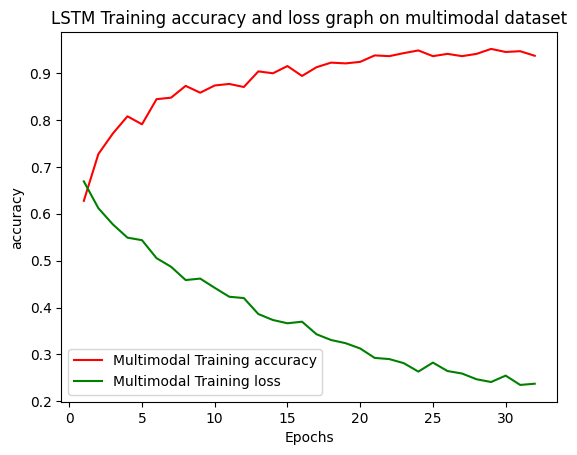

In [317]:
# Plotting training  accuracy for combined model
lstm_train_acc_m = histry_lstm_multimodal.history['accuracy']
lstm_train_loss_m = histry_lstm_multimodal.history['loss']
epochs = range(1, len(histry_lstm_multimodal.history['accuracy'] )+ 1)
plt.plot(epochs, lstm_train_acc_m, 'r', label='Multimodal Training accuracy')
plt.plot(epochs, lstm_train_loss_m, 'g', label='Multimodal Training loss')
plt.title('LSTM Training accuracy and loss graph on multimodal dataset')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [318]:
# Evaluate the model on test data
test_loss, test_acc = lstm_merged_model.evaluate([test_features, x_test], y_test)


# Get the last accuracy value for training and testing
train_acc_last = histry_lstm_multimodal.history['accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)

10/10 [==============================] - 3s 21ms/step - loss: 0.8245 - accuracy: 0.6278
Last accuracy value for training:  0.9366883039474487
Last accuracy value for testing:  0.6278316974639893


# BiLSTM Model

In [319]:
import numpy as np
np.random.seed(0)


In [320]:
BiLSTM_m_t=Sequential()
np.random.seed(0)
BiLSTM_m_t.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))
BiLSTM_m_t.add(Bidirectional(LSTM(32,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1]))))
BiLSTM_m_t.add(BatchNormalization())
BiLSTM_m_t.add(Dropout(0.1))
BiLSTM_m_t.add(Flatten())
BiLSTM_m_t.add(Dense(64))
BiLSTM_m_t.add(Dropout(0.1))
BiLSTM_m_t.add(Dense(32))
BiLSTM_m_t.add(Dropout(0.1))
BiLSTM_m_t.add(Dense(2,activation='softmax'))


BiLSTM_model_i = Sequential()
BiLSTM_model_i.add(Reshape((7, 7*512), input_shape=(7, 7, 512)))
BiLSTM_model_i.add(Bidirectional(LSTM(32, return_sequences=True)))
BiLSTM_model_i.add(BatchNormalization())
BiLSTM_model_i.add(Dropout(0.1))
BiLSTM_model_i.add(Bidirectional(LSTM(64)))
BiLSTM_model_i.add(BatchNormalization())
BiLSTM_model_i.add(Dropout(0.1))
BiLSTM_model_i.add(Dense(64, activation='relu'))
BiLSTM_model_i.add(BatchNormalization())
BiLSTM_model_i.add(Dropout(0.1))
BiLSTM_model_i.add(Dense(32, activation='relu'))
BiLSTM_model_i.add(Dense(2, activation='softmax'))


# concatenate both models
bilstm_multi = concatenate([BiLSTM_model_i.output, BiLSTM_m_t.output], axis=1)
bilstm_multi_outputs = Dense(2, activation='softmax')(bilstm_multi)
bilstm_merged_model = Model(inputs=[BiLSTM_model_i.input, BiLSTM_m_t.input], outputs=bilstm_multi_outputs)


In [321]:
#plot_model(bilstm_merged_model, to_file=outputPath+'bilstm_merged_model.png', show_shapes=True, show_layer_names=True)

In [322]:
bilstm_merged_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_bilstm_multimodal = bilstm_merged_model.fit([train_features,x_train], y_train, epochs=32, batch_size=32)

Epoch 1/32
39/39 [==============================] - 22s 110ms/step - loss: 0.6516 - accuracy: 0.6485
Epoch 2/32
39/39 [==============================] - 5s 133ms/step - loss: 0.5719 - accuracy: 0.7638
Epoch 3/32
39/39 [==============================] - 4s 96ms/step - loss: 0.5105 - accuracy: 0.8304
Epoch 4/32
39/39 [==============================] - 4s 97ms/step - loss: 0.4721 - accuracy: 0.8620
Epoch 5/32
39/39 [==============================] - 6s 150ms/step - loss: 0.4336 - accuracy: 0.8831
Epoch 6/32
39/39 [==============================] - 4s 97ms/step - loss: 0.4031 - accuracy: 0.9050
Epoch 7/32
39/39 [==============================] - 4s 97ms/step - loss: 0.3686 - accuracy: 0.9229
Epoch 8/32
39/39 [==============================] - 5s 137ms/step - loss: 0.3457 - accuracy: 0.9294
Epoch 9/32
39/39 [==============================] - 4s 105ms/step - loss: 0.3296 - accuracy: 0.9334
Epoch 10/32
39/39 [==============================] - 4s 97ms/step - loss: 0.3184 - accuracy: 0.9367
Epo

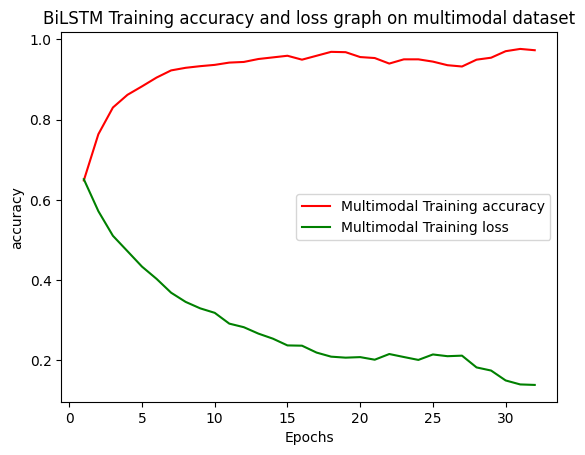

In [323]:
# Plotting training  accuracy for combined model
bilstm_train_acc_m = history_bilstm_multimodal.history['accuracy']
bilstm_train_loss_m = history_bilstm_multimodal.history['loss']
epochs = range(1, len(history_bilstm_multimodal.history['accuracy'] )+ 1)
plt.plot(epochs, bilstm_train_acc_m, 'r', label='Multimodal Training accuracy')
plt.plot(epochs, bilstm_train_loss_m, 'g', label='Multimodal Training loss')
plt.title('BiLSTM Training accuracy and loss graph on multimodal dataset')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [324]:
# Evaluate the model on test data
test_loss, test_accc = bilstm_merged_model.evaluate([test_features, x_test], y_test)


# Get the last accuracy value for training and testing
train_acc_last = history_bilstm_multimodal.history['accuracy'][-1]
test_accc_last = test_accc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_accc_last)

10/10 [==============================] - 3s 35ms/step - loss: 0.7848 - accuracy: 0.6472
Last accuracy value for training:  0.9732142686843872
Last accuracy value for testing:  0.647249162197113


# CNN Model

In [325]:
from keras.layers import Concatenate, BatchNormalization
from keras.models import Model

# image input layer
image_input = Input(shape=(7, 7, 512))
conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(image_input)
pool1 = MaxPooling2D((2,2))(conv1)
conv2 = Conv2D(64, (3,3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2,2))(conv2)
flatten = Flatten()(pool2)

# text input layer
text_input = Input(shape=(maxlen,))
embedding = Embedding(vocab_size, output_dim=DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False)(text_input)
reshape = Reshape((maxlen, DIM, 1))(embedding)
conv3 = Conv2D(32, (3,3), activation='relu', padding='same')(reshape)
pool3 = MaxPooling2D((2,2))(conv3)
conv4 = Conv2D(64, (3,3), activation='relu', padding='same')(pool3)
pool4 = MaxPooling2D((2,2))(conv4)
flatten2 = Flatten()(pool4)

# merge CNN layers with text input layer
merged = Concatenate()([flatten, flatten2])
hidden1 = Dense(64, activation='relu')(merged)
bn1 = BatchNormalization()(hidden1)
dropout1 = Dropout(0.1)(bn1)
hidden2 = Dense(32, activation='relu')(dropout1)
bn2 = BatchNormalization()(hidden2)
dropout2 = Dropout(0.1)(bn2)
output = Dense(2, activation='softmax')(dropout2)



In [326]:
# create model
cnn_multimodal = Model(inputs=[image_input, text_input], outputs=output)
cnn_multimodal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [327]:
#plot_model(cnn_multimodal, to_file=outputPath+'multi_cnn_model_plot.png', show_shapes=True, show_layer_names=True)

In [328]:
# train model
history_cnn_multimodal = cnn_multimodal.fit([train_features, x_train], y_train, epochs=32, batch_size=32)
# Plotting training  accuracy for combined model
cnn_train_acc_m = history_cnn_multimodal.history['accuracy']
cnn_train_loss_m = history_cnn_multimodal.history['loss']


Epoch 1/32
39/39 [==============================] - 18s 414ms/step - loss: 0.7441 - accuracy: 0.5763
Epoch 2/32
39/39 [==============================] - 16s 412ms/step - loss: 0.6005 - accuracy: 0.7045
Epoch 3/32
39/39 [==============================] - 16s 412ms/step - loss: 0.4264 - accuracy: 0.8157
Epoch 4/32
39/39 [==============================] - 16s 410ms/step - loss: 0.2603 - accuracy: 0.9107
Epoch 5/32
39/39 [==============================] - 17s 427ms/step - loss: 0.1361 - accuracy: 0.9627
Epoch 6/32
39/39 [==============================] - 17s 431ms/step - loss: 0.0804 - accuracy: 0.9838
Epoch 7/32
39/39 [==============================] - 17s 425ms/step - loss: 0.0586 - accuracy: 0.9886
Epoch 8/32
39/39 [==============================] - 16s 411ms/step - loss: 0.0429 - accuracy: 0.9919
Epoch 9/32
39/39 [==============================] - 16s 414ms/step - loss: 0.0410 - accuracy: 0.9935
Epoch 10/32
39/39 [==============================] - 16s 411ms/step - loss: 0.0333 - accura

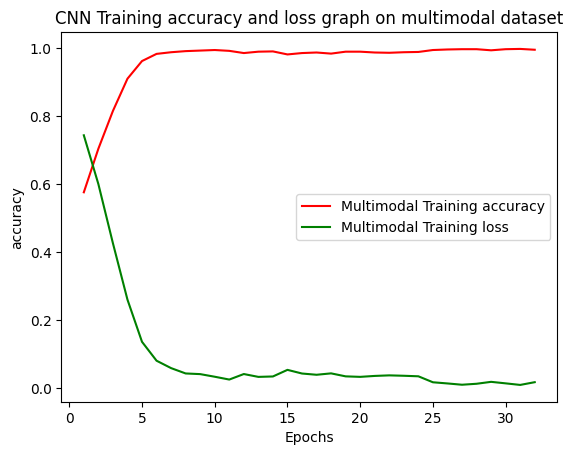

In [329]:
# Plotting training  accuracy for combined model

epochs = range(1, len(history_cnn_multimodal.history['accuracy'] )+ 1)
plt.plot(epochs, cnn_train_acc_m, 'r', label='Multimodal Training accuracy')
plt.plot(epochs, cnn_train_loss_m, 'g', label='Multimodal Training loss')
plt.title('CNN Training accuracy and loss graph on multimodal dataset')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()

In [330]:
# Evaluate the model on test data
test_loss, test_acc = cnn_multimodal.evaluate([test_features, x_test], y_test)

# Get the last accuracy value for training and testing
train_acc_last = history_cnn_multimodal.history['accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)

10/10 [==============================] - 1s 96ms/step - loss: 5.5741 - accuracy: 0.5405
Last accuracy value for training:  0.9959415793418884
Last accuracy value for testing:  0.5404530763626099


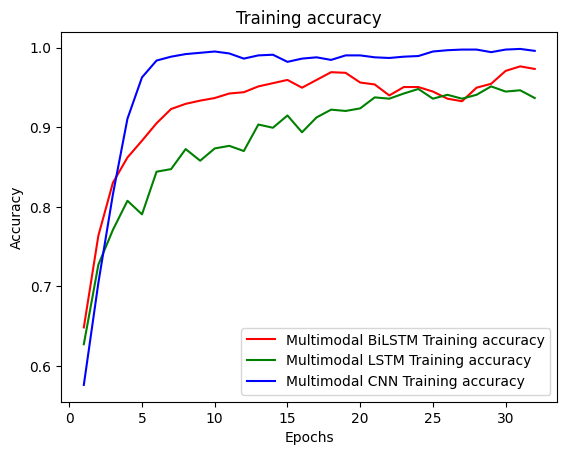

In [331]:
# Plotting training and validation accuracy for combined model
loss_values_bilstm_multimodal = history_bilstm_multimodal.history['accuracy']
loss_values_lstm_multimodal = histry_lstm_multimodal.history['accuracy']
loss_values_cnn_multimodal = history_cnn_multimodal.history['accuracy']
epochs = range(1, len(history_bilstm_multimodal.history['accuracy'] )+ 1)


plt.plot(epochs, loss_values_bilstm_multimodal, 'r', label='Multimodal BiLSTM Training accuracy')
plt.plot(epochs, loss_values_lstm_multimodal, 'g', label='Multimodal LSTM Training accuracy')
plt.plot(epochs, loss_values_cnn_multimodal, 'b', label='Multimodal CNN Training accuracy')


plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig("com_model_Accuracy.png")
plt.show()

# Updated code to run in CMD

In [ ]:
class MyModel:
    def __init__(self):
        self.Adam_optimizer = keras.optimizers.Adam(lr=1e-3)

In [332]:
def NecessaryLibrary():
    import numpy as np
    import pandas as pd
    import plotly.express as px
    import nltk 
    import tensorflow as tf
    from tensorflow.keras import regularizers
    import keras
    from keras.preprocessing.text import Tokenizer
    from keras.activations import *
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
    from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
    from gensim.models import Word2Vec
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from keras.models import load_model
    import matplotlib.pyplot as plt
    from tensorflow.keras.applications.efficientnet import preprocess_input
    from keras.preprocessing.text import Tokenizer
    from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply, Flatten
    from keras.models import Model
    from keras import preprocessing, Input
    import os
    import cv2
    import gensim
    from keras.utils.vis_utils import plot_model
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
    from sklearn.metrics import classification_report, accuracy_score
    from keras.layers import BatchNormalization
    from keras.layers.rnn.bidirectional import Bidirectional
    from keras.layers import LSTM, BatchNormalization, Dropout, Dense
    from PIL import Image, ImageFile
    from keras_preprocessing.sequence import pad_sequences
    from keras_preprocessing import sequence


SyntaxError: ignored